# Introduction to Jupyter Notebooks, Pykat, and Finesse

## Installing Software

You have already received instructions on how to install Python, Pykat, Finesse, and a link to the pages that this notebook is based off already. If these did not install correctly we will find out today and can hopefully fix that.

## Let's Get Started: Python and Jupyter Notebooks
Most of you are already familiar with the *Python* programming language, and some with *Jupyter* notebooks. For anybody unfamiliar with either, we have provided some basic introduction and links for more information below. Even if you already know Python / Jupyter, it's a good idea to have a quick look through this as a refresher.
 
### Python
 <a href="https://www.python.org/">Python</a> is a powerful programming language which is particularly useful for fast development and scripting. We will use only a very small subset of Python's functionality. In particular, we will do simple mathematical operations using the package <a href="http://www.numpy.org/">Numpy</a>, some simple string operations, and we will plot output data.

We recommend that you do **not** try to learn Python in general right now, but search the web for a solution for each particular task. A good starting point, for example, is the <a href="http://nbviewer.ipython.org/gist/rpmuller/5920182">A Crash Course in Python for Scientists</a>.

More info can be found in:
  * The <a href="https://docs.python.org/2/tutorial/">Python tutorial</a>
  * The <a href="http://wiki.scipy.org/Tentative_NumPy_Tutorial">Numpy tutorial</a>
  
### The Jupyter Notebook

#### Getting started

We will start every notebook by loading PyKat and the other Python packages we will need. These are explained in more detail below.

(type `shift`+`enter` to run)

In [4]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90,fmts=['png'])

#### Text Cells

These cells are just text, fomatted using *Markdown*: http://daringfireball.net/projects/markdown/syntax. **Double-click** on a text cell to edit it.

You can also use <span style="color:green;">HTML commands</span> and Latex commands (for example:  $\Delta L = L_X - L_Y$) in the markdown cells.

For any optical simulation it is very useful to prepare a sketch of the optical layout. We typically use <a href="https://inkscape.org">Inkscape</a> and the <a href="http://www.gwoptics.org/ComponentLibrary/">ComponentLibrary</a> to prepare such sketches as Scalable Vector Graphics (svg files). You can insert images into notebooks in several ways, for example using HTML commands inside a text cell like this:

<img src="http://www.gwoptics.org/images/finesse_box_100px.png">

You can also link to local image files in the same way.

#### Code Cells
Code cells are the main element in the Jupyter notebook. When you press '`shift`+`enter`' the content of the cell will be evaluated as Python code and an output cell is created to display the result, see the simple examples below.

In [2]:
# Adding numbers
a=5
b=20
print(a+b)

25


In [3]:
# Joining strings together
one='red '
two='car'
print(one+two)

red car


In [4]:
# Outputting sentences
r = 2
area = r**2
print("This is a good way to present results: The area is {0:.1f} km^2".format(area))

This is a good way to present results: The area is 4.0 km^2


#### Plotting
  
Python provides a number of powerful plotting packages. We will be using inline plots based on the 'matplotlib' package. Examples and documentation can be found online, for example a <a href="http://nbviewer.ipython.org/gist/yymm/6805429">notebook with good plotting examples</a>, or this <a href="http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb"> extensive lecture on plotting</a>. Below is the code for a simple example:

x = [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]


Text(0, 0.5, 'y [some other units]')

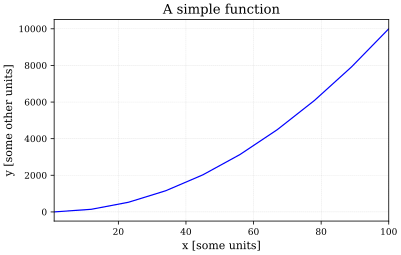

In [5]:
# create a data vector with 10 elements
x=np.linspace(1, 100, 10) 

print("x = {0}".format(x))

y = x*x

plt.plot(x, y)
plt.title('A simple function')
plt.xlabel('x [some units]')
plt.ylabel('y [some other units]')

**Important**: If your plots are looking too big or too small then you will need to change the DPI setting to suit your monitor. At the top of this page is a line of code that looks like `pykat.init_pykat_plotting(dpi=90)`, either increase of decrease this to find a scaling that suits you.

## Finesse and Pykat

<a href="http://www.gwoptics.org/finesse">Finesse</a> is an interferometer simulation software, developed for the design and commissioning of laser-interferometric gravitational wave detectors. As such it is optimised for modelling the main interferometers of LIGO, Virgo, GEO etc, but it is also a simple and versatile tool to learn basic laser optics. Examples and an extensive manual for Finesse can be found on the <a href="http://www.gwoptics.org/finesse">Finesse page</a>.

<a href="http://www.gwoptics.org/pykat">PyKat</a> is a Python wrapper for the interferometer simulation Finesse. This allows us to **run Finesse** from an Jupyter notebook. The main advantage of using Finesse in this way is that Python offers the ability to do **post-processing of the Finesse output** very easily in the notebook. 

You should have a read of these notebooks: 
- <a href='./Finesse.ipynb'>Finesse notebook</a>
- <a href='./Pykat.ipynb'>Pykat notebook</a> - this should be used as a reference on how to use Pykat throughout this school.

### Simple Finesse and Pykat Example
Here we construct a simple Finesse model of a laser beam shining on a mirror. In this simulation we just vary the input laser power and see how much is reflected and transmitted. To measure the laser power we put two photodiodes on reflection and transmission at the mirror.

In [6]:
kat = finesse.kat()
kat.verbose = False

code = """
l laser1 1.0 0 n1 
s s1 0 n1 n2

pd Prefl n2
pd Ptran n3

m m1 0.9 0.1 0 n2 n3

xaxis laser1 P lin 0 1 10
yaxis abs 
"""

kat.parse(code)

out1 = kat.run()

The data can be plotted in multiple ways. If quickly want to see the results we suggest using the builtin plotting command for the output:

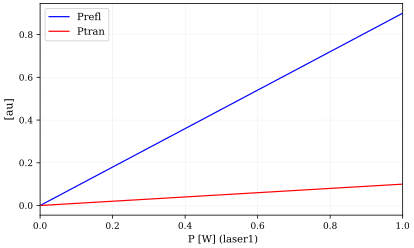

In [7]:
# Plotting the results of an output can be done using the builtin command
fig = out1.plot()

This will produce a plot using all the detectors enabled in the model. It should be noted that the yaxis units is [au] because multiple quantities can be shown at the same time. For example, a beam's power in Watts can be plotted along with the size of a beam. Thus to infer the units of a trace you must look at what type of detector has been used.

The builtin plotting function has many options that can be set to customise the plot. For more examples on using this please see the notebook on <a href="pykat_plotting.ipynb" target="_blank">plotting</a>.

However, if you would rather make a plot yourself you can always just use matplotlib commands as per usual:

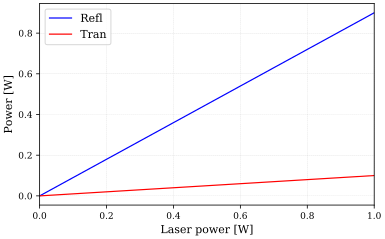

In [8]:
plt.plot(out1.x, out1["Prefl"], label="Refl")
plt.plot(out1.x, out1["Ptran"], label="Tran")

plt.xlim(out1.x.min(), out1.x.max())

plt.ylabel("Power [W]")
plt.xlabel("Laser power [W]")
plt.legend()

The `out` object returned by `run()` command is an important one as it contains all the results from the simulation. It is important to remember that when Finesse outputs some results it is just an array of numbers: the number of steps in the simulation set with the `xaxis` and the outputted value of each of the detectors you have added.

You can see the raw outputs with:

In [9]:
print(out1.x) # show the xaxis values
print(out1.y) 

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[[0.   0.  ]
 [0.09 0.01]
 [0.18 0.02]
 [0.27 0.03]
 [0.36 0.04]
 [0.45 0.05]
 [0.54 0.06]
 [0.63 0.07]
 [0.72 0.08]
 [0.81 0.09]
 [0.9  0.1 ]]


As you can see, they are quite long and not easily readable. Here we just have one detector, however, if we have more we would have more columns of data. To find out which column is which you need to look at the `out.ylabels` array:

In [10]:
print(out1.ylabels)

['Prefl', 'Ptran']


However, the recommended method for accessing the values of a particular detector is by using the detector's name as shown here:

In [11]:
out1["Prefl"]

array([0.  , 0.09, 0.18, 0.27, 0.36, 0.45, 0.54, 0.63, 0.72, 0.81, 0.9 ])

## Tasks
In each notebook we will provide some tasks for you to complete. In each task section you should add your code you write to complete the task. After the sessions we will have a show and tell from some students about how they did each task.

You should **help each other**, **work in groups**, organise yourselves and don't forget to ask for help if needed!

<div style="background-color:#cceffc;padding:10px;">

### Task:  Copy and run an exisiting Finesse example

First, let's just get up and running by trying something simple. Don't worry about understanding any physics here, this example is just about getting something running correctly before we proceed.

**(a)** Copy the Finesse code for <a href="http://www.gwoptics.org/finesse/examples/mirror_shake.php">radiation pressure effects</a> from the Finesse pages.

**(b)** Load this into a `kat` object as shown above and run it

**(c)** Plot all of the outputs
</div>

--------------------------------------------------------------
Running kat - Started at 2020-06-09 16:04:50.865371
Used Finesse 2.3.1 at /home/lantyem/tmp/finesse/kat

Finished in 0.0547559 seconds


100% | ETA:  0:00:00 | Calculating                                             

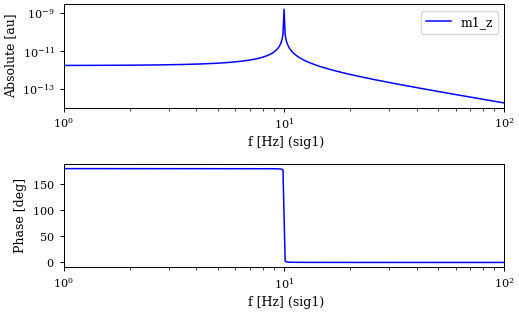

In [5]:
code = """
%------------------------------------------------------------------------
% Finesse input file to plot the mirror motion due to radiation pressure
% Daniel Brown 21.03.2014
%------------------------------------------------------------------------ 
 
# optical setup: laser, space and mirror:
l l1 1 0 n1
s s1 1 n1 n2
m m1 1 0 0 n2 n3
 
# define transfer function with pole at 10Hz and Q factor 1000
tf pendulum 1 0 p 10 1000
# apply transfer function to mirror as force->motion
attr m1 mass 1 zmech pendulum     
 
# measuring the mirror longitudinal motion
xd m1_z m1 z
 
# generate amplitude modulation at the laser 
fsig sig1 l1 amp 1 0
 
xaxis sig1 f log 1 100 400
yaxis log abs:deg
"""

kat = finesse.kat()
kat.parse(code)
out = kat.run()

out.plot()